In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Diabetes Binary Classification Dataset</h2>

Input Features:
'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age' <br>

Target Feature: 
'diabetes_class'<br>

Objective: Predict diabetes_class for given input features<br>

<h4>Data Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes </h4>

In [2]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [3]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [4]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


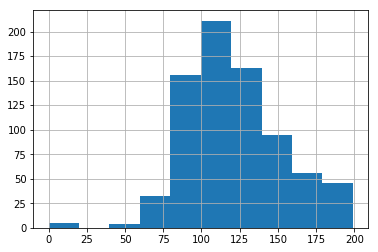

In [5]:
df['glucose_concentration'].hist()
plt.show()

In [6]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [7]:
# Separate diabetic and normal samples
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

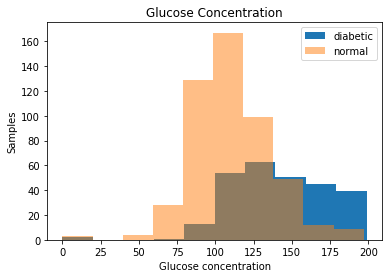

In [8]:
# Glucose concentration histogram
plt.hist(df[diabetic].glucose_concentration,label='diabetic')
plt.hist(df[normal].glucose_concentration,alpha=0.5,label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

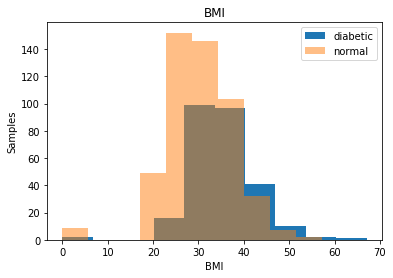

In [9]:
# BMI histogram
plt.hist(df[diabetic].bmi,label='diabetic')
plt.hist(df[normal].bmi,alpha=0.5,label='normal')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

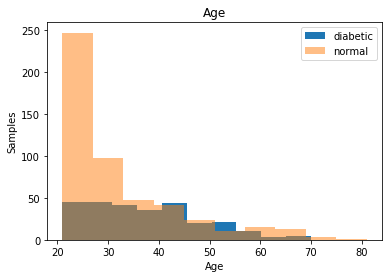

In [10]:
# Age
plt.hist(df[diabetic].age,label='diabetic')
plt.hist(df[normal].age,alpha=0.5,label='normal')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

## Training and Validation Set
### Target Variable as first column followed by input features:
'diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age'
### Training, Validation files do not have a column header

In [11]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [12]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [13]:
rows, train, test

(768, 537, 231)

In [14]:
# Write Training Set
df[:train].to_csv('diabetes_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [15]:
# Write Validation Set
df[train:].to_csv('diabetes_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [16]:
# Write Column List
with open('diabetes_train_column_list.txt','w') as f:
    f.write(','.join(columns))